In [1]:
# Post processing notebook for the turbine simulation

import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
import scipy.interpolate as interp



print('This is running!')

This is running!


[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


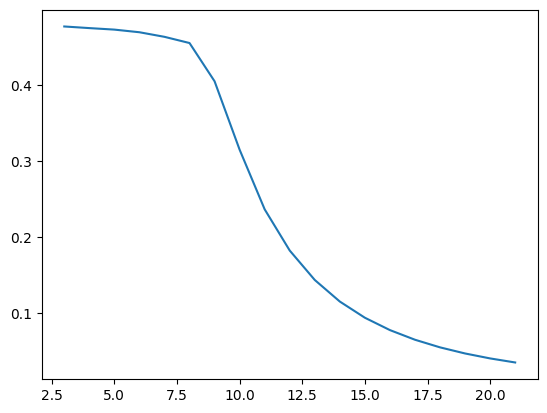

In [2]:
# Making the C_p curve:
# (Using NREL 3.4 MW AMERICA Project turbine for this study)

wind_speed = np.arange(3,22)
Cp = [0.477052565, 0.474919282, 0.472926143, 0.469454855, 0.463415172, 0.455251545, 0.404872057, 0.314731303, 0.236174107, 
      0.181907351,0.143118972, 0.114706621, 0.093398237, 0.077103473, 0.064401487, 0.054359657, 0.046314815, 0.03979152, 
      0.034449916]
print(wind_speed)
fig1 = plt.figure()
plt.plot(wind_speed, Cp)
Cp_curve = interp.interp1d(wind_speed, Cp)

<class 'netCDF4._netCDF4.Group'>
group /T00:
    normal: [-0.9781476  -0.20791169  0.        ]
    sample_normal: [-0.9781476  -0.20791169  0.        ]
    diameter: 164.0
    epsilon: 10.0
    sample_diameters: 1.0
    dimensions(sizes): num_actuator_points(20), num_velocity_points(200)
    variables(dimensions): float64 time(num_time_steps), float64 xyz(num_actuator_points, ndim), float64 xyz_v(num_velocity_points, ndim), float64 vref(num_time_steps, ndim), float64 vdisk(num_time_steps, ndim), float64 ct(num_time_steps), float64 density(num_time_steps)
    groups: 
[ 7.65799983  1.53114249 -0.21926754]
False
<class 'netCDF4._netCDF4.Group'>
group /T01:
    normal: [-0.9781476  -0.20791169  0.        ]
    sample_normal: [-0.9781476  -0.20791169  0.        ]
    diameter: 164.0
    epsilon: 10.0
    sample_diameters: 1.0
    dimensions(sizes): num_actuator_points(20), num_velocity_points(200)
    variables(dimensions): float64 time(num_time_steps), float64 xyz(num_actuator_points, ndi

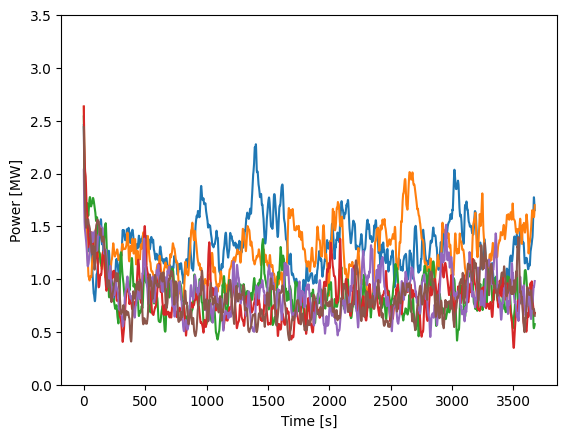

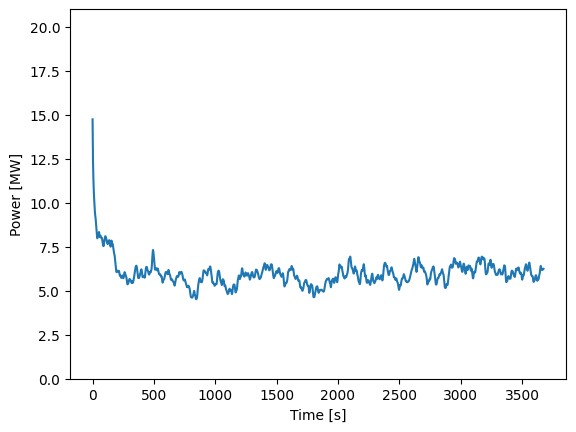

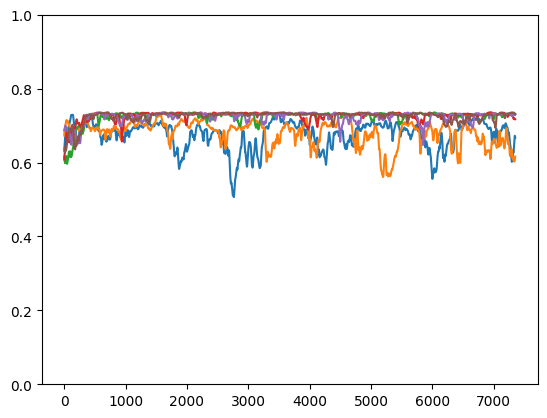

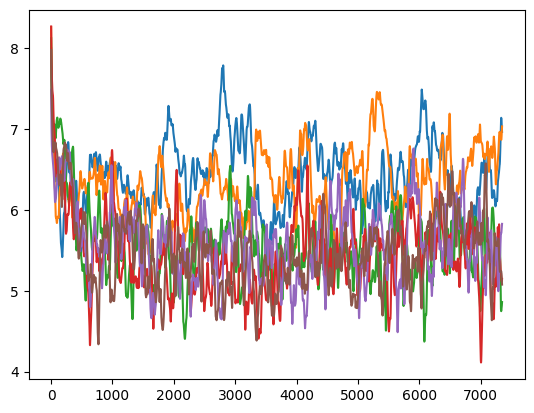

In [8]:
# Loading in data from turbines 

# Turbine data
hub_height = 120  # meters
D = 164           # meters

turbine_data = {}
for i in range(6):
    
    turb_num = 'T0'+str(i)
    turbine_data[turb_num] = {}
    T1 = ncdf.Dataset("post_processing/actuator65000/"+turb_num+".nc")
    print(T1.groups[turb_num])
    print(T1.groups[turb_num]['vdisk'][5,:])
    
    turbine_data[turb_num]['ct'] = T1.groups[turb_num]['ct'][:]
    turbine_data[turb_num]['vdisk_x'] = T1.groups[turb_num]['vdisk'][:,0]
    turbine_data[turb_num]['density'] = T1.groups[turb_num]['density'][:]

    vdisk_x = turbine_data[turb_num]['vdisk_x'][:]
    print(np.ma.is_masked(vdisk_x))
    Cp = [Cp_curve(x) for x in vdisk_x]

    turbine_data[turb_num]['power'] = 0.5 * np.pi * (D/2)**2 * turbine_data[turb_num]['density'][:] * \
                    Cp * turbine_data[turb_num]['vdisk_x'][:] **3 / 1e6
    
# Plotting quantities
fig3 = plt.figure()
total_power = np.zeros((len(turbine_data[turb_num]['power'][:])))
time = np.arange(len(total_power)) / 2
for i in range(6):
    
    turb_num = 'T0'+str(i)
    plt.plot(time, turbine_data[turb_num]['power'])
    total_power += turbine_data[turb_num]['power'][:]
plt.ylim([0,3.5])
plt.ylabel('Power [MW]')
plt.xlabel('Time [s]')
# plt.savefig('turbine_power_indv_7ms.png')
    
fig4 = plt.figure()
plt.plot(time, total_power)
plt.ylim([0,21])
plt.ylabel('Power [MW]')
plt.xlabel('Time [s]')
# plt.savefig('turbine_power_total_7ms.png')

print(np.mean(turbine_data[turb_num]['vdisk_x']))
print(np.mean(turbine_data[turb_num]['power']))
    
fig5 = plt.figure()
for i in range(6):
    
    turb_num = 'T0'+str(i)
    plt.plot(turbine_data[turb_num]['ct'])
    
plt.ylim([0,1])

fig5 = plt.figure()
for i in range(6):
    
    turb_num = 'T0'+str(i)
    plt.plot(turbine_data[turb_num]['vdisk_x'])
    


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind data sampling output
    version: beb163393a41
    created_on: Tue Jan 10 15:53:54 2023

    dimensions(sizes): num_time_steps(147), ndim(3)
    variables(dimensions): float64 time(num_time_steps)
    groups: p_hub
<class 'netCDF4._netCDF4.Group'>
group /p_hub:
    sampling_type: PlaneSampler
    ijk_dims: [513 513   6]
    origin: [0. 0. 5.]
    axis1: [5000.    0.    0.]
    axis2: [   0. 5000.    0.]
    axis3: [0. 0. 1.]
    offsets: [  0.  30. 120. 190. 224. 270.]
    dimensions(sizes): num_points(1579014)
    variables(dimensions): float64 coordinates(num_points, ndim), float64 velocityx(num_time_steps, num_points), float64 velocityy(num_time_steps, num_points), float64 velocityz(num_time_steps, num_points), float64 temperature(num_time_steps, num_points)
    groups: 
(147, 1579014)
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    titl

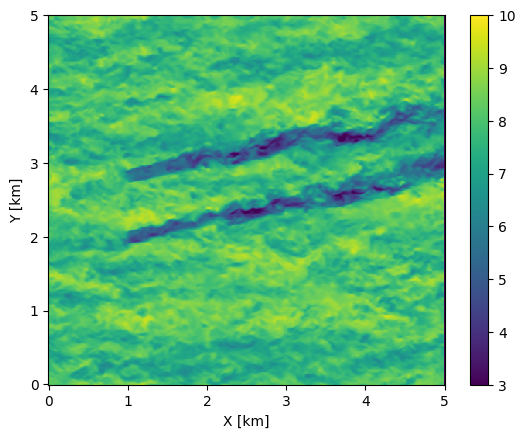

In [7]:
# Loading sample plain 

s1 = ncdf.Dataset("post_processing/sampling65000.nc")
print(s1)
print(s1.groups['p_hub'])
print(np.shape(s1.groups['p_hub']['velocityx']))
spacing = np.linspace(0,5, 513)

# Plotting the sample plane
fig3 = plt.figure()
plain01 = s1.groups['p_hub']['velocityx'][100,:]
dim = 513
plain = 2
plain02 = plain01[plain*dim*dim:(plain+1)*dim*dim].reshape(513,513)

# plt.pcolor(spacing, spacing, plain02, vmin=3, vmax=10)  # to limit the values on the color axis
plt.pcolor(spacing, spacing, plain02)
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.colorbar()
#     plt.savefig('velfield_'+str(i)+'.png')

#### Code for plotting images to use to make a video of the flow ####
# for i in range(75,100):
#     fig3 = plt.figure()
#     plain01 = s1.groups['p_hub']['velocityx'][i,:]
#     dim = 513
#     plain = 2
#     plain02 = plain01[plain*dim*dim:(plain+1)*dim*dim].reshape(513,513)
# #     print(plain02)

#     plt.pcolor(spacing, spacing, plain02, vmin=3, vmax=7.5)
#     plt.xlabel('X [km]')
#     plt.ylabel('Y [km]')
#     plt.colorbar()
#     plt.savefig("velfield_{:03}.png".format(i))
# #     plt.savefig('velfield_'+str(i)+'.png')
#     plt.close()

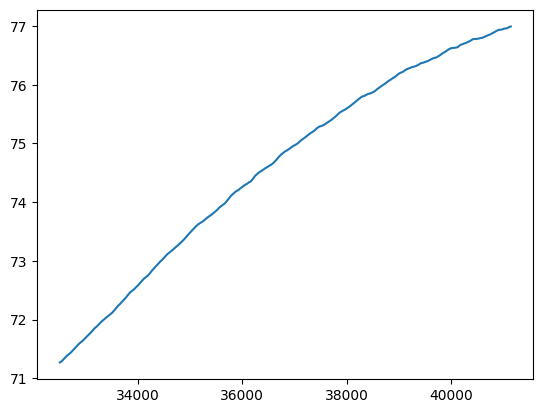

In [11]:
# Plotting kinetic energy

# ke = np.loadtxt('post_processing/ke77000.txt', skiprows=1)
ke1 = np.loadtxt('post_processing/ke65000.txt', skiprows=1)

fig1 = plt.figure()
plt.plot(ke1[:,1], ke1[:,2])
# plt.plot(ke[:,1], ke[:,2])

u
(17300, 128)
v
(17300, 128)


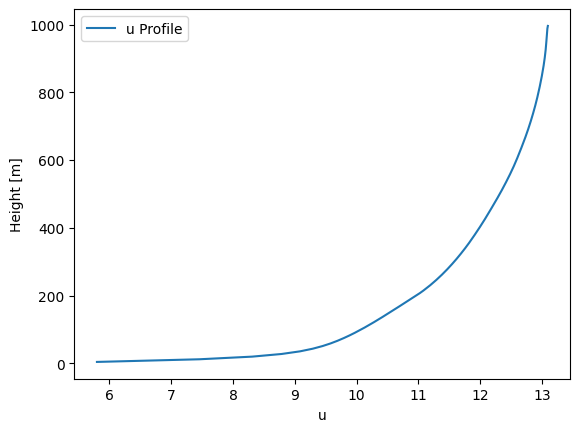

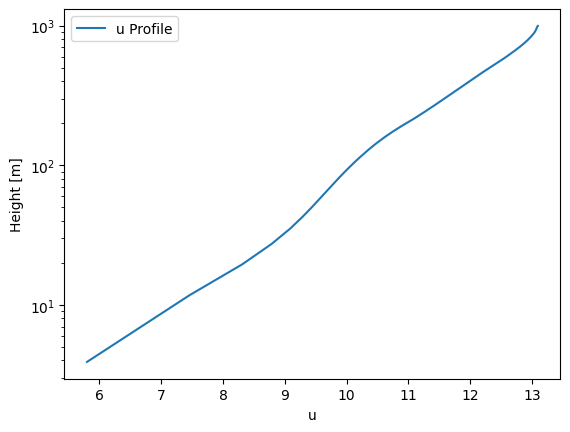

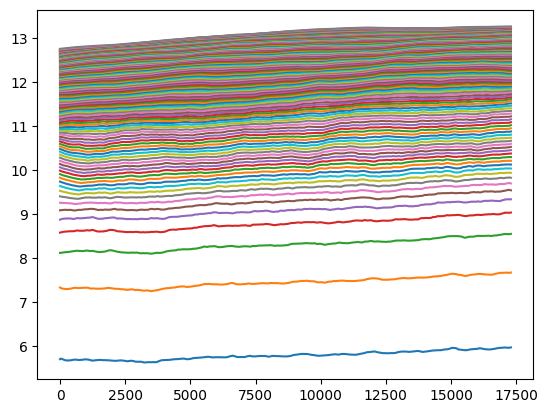

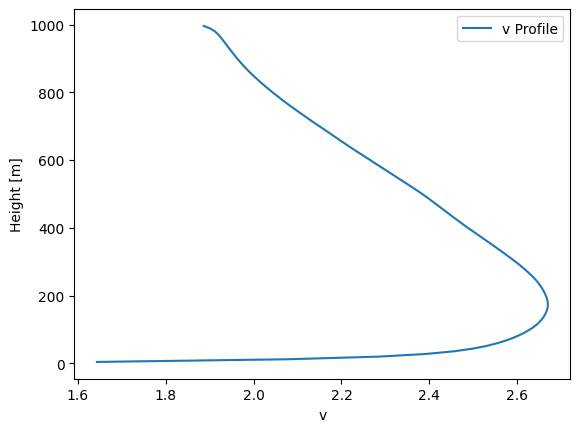

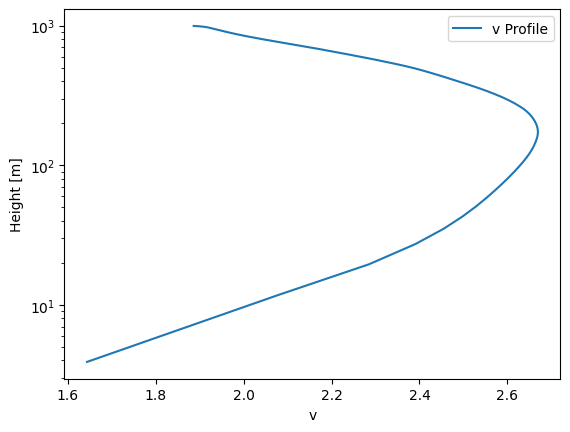

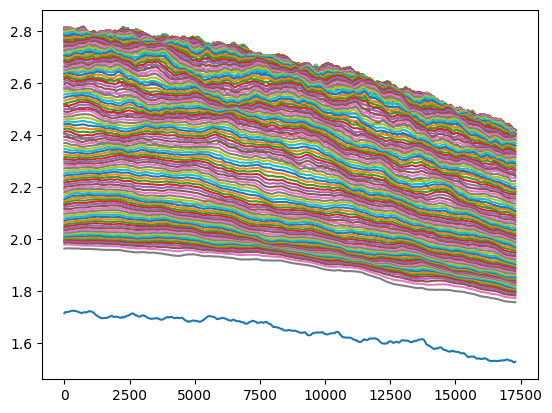

In [12]:
def plot_stuff(field):

    d1 = ncdf.Dataset("post_processing/abl_statistics65000.nc")
#     d2 = ncdf.Dataset("post_processing/abl_statistics44000.nc")

    g1 = d1.groups["mean_profiles"]
#     g2 = d2.groups["mean_profiles"]

    print(field)
#     print(np.shape(g2.variables[field]), np.shape(g1.variables[field]), type(g2.variables[field]))
#     u1 = np.concatenate((g1.variables[field][:,:], g2.variables[field][:,:]), axis = 0)
    u1 = g1.variables[field][:,:]
    print(np.shape(u1))
    
#     uu = g1.variables["u'u'_r"][:,:]
#     TI = np.mean(uu / u1)
#     print(TI * 100)
#     jkjkjk

    # avg 5-6 hrs, 5hrs -> 3600*5*2 = 36000 timesteps
  # todo, there is a time variable in netcdf file that could be used to find the correct time steps
    uavg1 = np.average(u1[:],axis=0)
#     print(uavg1)
#     uavg1 = np.average(u1[35999:43199],axis=0)

    z = g1.variables["h"][0:]
#     z_whole = [g2.variables["h"][0:]] + [g1.variables["h"][0:]]

    plt.figure()
    plt.clf()
    plt.plot(uavg1, z, label=field + " Profile")
#     plt.plot([3,8], [100, 100], '--')
    plt.legend()
    plt.xlabel(field)
    plt.ylabel("Height [m]")
    plt.savefig(field+"avg.pdf")
    plt.savefig(field+"avg.png")
    
    
    plt.figure()
    plt.clf()
    plt.plot(uavg1, z, label=field + " Profile")
    plt.yscale("log")
    plt.legend()
    plt.xlabel(field)
    plt.ylabel("Height [m]")
    plt.savefig(field+"avg.pdf")
    plt.savefig(field+"avg.png")   
    
    plt.figure()
    for i in range(128):
        plt.plot(u1[:,i])
#     jkjk

if __name__ == "__main__":
    d1 = ncdf.Dataset("post_processing/abl_statistics65000.nc")
    
    plot_stuff("u")
    plot_stuff("v")
